# Robot Sensei
สมาชิกกลุ่ม


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, filtfilt

# โหลดข้อมูล
df = pd.read_csv("robotsensei.csv")
df2 = pd.read_csv("robot_full_data.csv")
df2 = df2[df2['tof'] <= 1000].reset_index(drop=True)

# แปลง timestamp เป็น datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# คำนวณเวลาที่ผ่านไปจากจุดเริ่มต้น (เป็นวินาที)
df['elapsed_time'] = (df['timestamp'] - df['timestamp'].iloc[0]).dt.total_seconds()


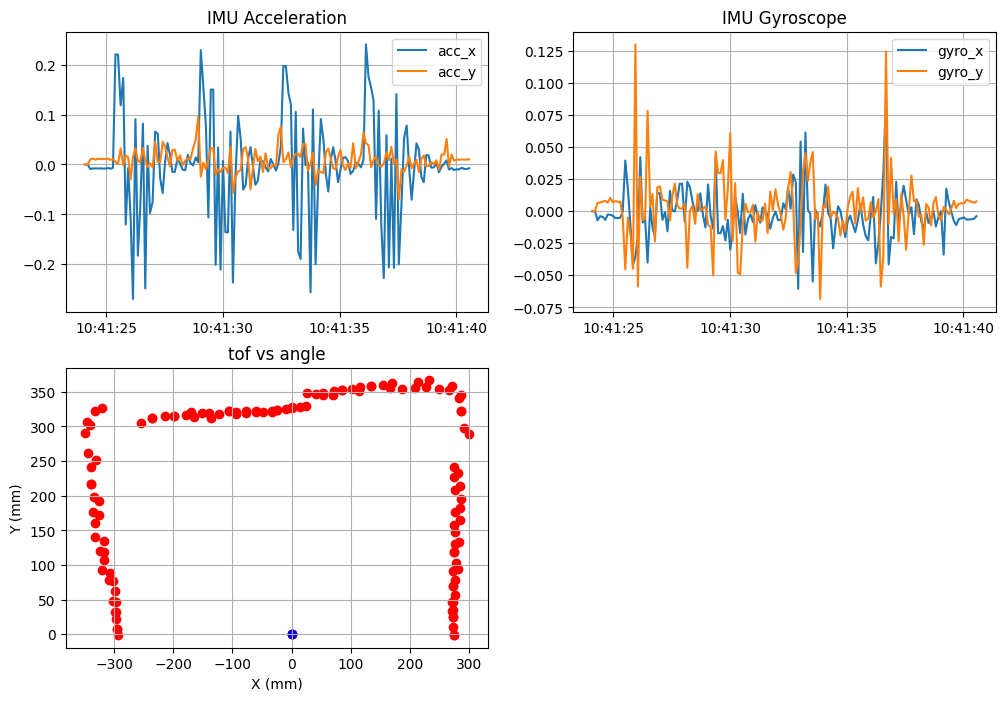

In [2]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(df['timestamp'], df['imu_acc_x'], label='acc_x')
plt.plot(df['timestamp'], df['imu_acc_y'], label='acc_y')
plt.title('IMU Acceleration')
plt.legend()
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(df['timestamp'], df['imu_gyro_x'], label='gyro_x')
plt.plot(df['timestamp'], df['imu_gyro_y'], label='gyro_y')
plt.title('IMU Gyroscope')
plt.legend()
plt.grid()

plt.subplot(2, 2, 3)
angles_rad = np.deg2rad(df2['angle'])
distances = (df2['tof'])
u = distances * np.cos(angles_rad)
v = distances * np.sin(angles_rad)
plt.scatter(v, u, color='red')
plt.scatter(0, 0, color='b')
plt.grid()
plt.title('tof vs angle')
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.show()


In [3]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w)/w, mode='same')

df['acc_x_ma5'] = moving_average(df['imu_acc_x'], 5)
df['acc_x_ma10'] = moving_average(df['imu_acc_x'], 10)
df['acc_y_ma5'] = moving_average(df['imu_acc_y'], 5)
df['acc_y_ma10'] = moving_average(df['imu_acc_y'], 10)
df['gyro_x_ma5'] = moving_average(df['imu_gyro_x'], 5)
df['gyro_x_ma10'] = moving_average(df['imu_gyro_x'], 10)
df['gyro_y_ma5'] = moving_average(df['imu_gyro_y'], 5)
df['gyro_y_ma10'] = moving_average(df['imu_gyro_y'], 10)
df2['tof_ma5'] = moving_average(df2['tof'], 5)
df2['tof_ma10'] = moving_average(df2['tof'], 10)


In [4]:
from scipy.signal import medfilt

df['acc_x_med5'] = medfilt(df['imu_acc_x'], kernel_size=5)
df['acc_x_med11'] = medfilt(df['imu_acc_x'], kernel_size=11)
df['acc_y_med5'] = medfilt(df['imu_acc_y'], kernel_size=5)
df['acc_y_med11'] = medfilt(df['imu_acc_y'], kernel_size=11)
df['gyro_x_med5'] = medfilt(df['imu_gyro_x'], kernel_size=5)
df['gyro_x_med11'] = medfilt(df['imu_gyro_x'], kernel_size=11)
df['gyro_y_med5'] = medfilt(df['imu_gyro_y'], kernel_size=5)
df['gyro_y_med11'] = medfilt(df['imu_gyro_y'], kernel_size=11)
df2['tof_med5'] = medfilt(df2['tof'], kernel_size=5)
df2['tof_med11'] = medfilt(df2['tof'], kernel_size=11)


In [ ]:
def low_pass_filter(data, cutoff, fs=100, order=4):
    nyq = 0.5 * fs
    norm_cutoff = cutoff / nyq
    b, a = butter(order, norm_cutoff, btype='low')
    return filtfilt(b, a, data)

df['acc_x_lp1'] = low_pass_filter(df['imu_acc_x'], 1.0)
df['acc_x_lp3'] = low_pass_filter(df['imu_acc_x'], 3.0)
df['acc_y_lp1'] = low_pass_filter(df['imu_acc_y'], 1.0)
df['acc_y_lp3'] = low_pass_filter(df['imu_acc_y'], 3.0)
df['gyro_x_lp1'] = low_pass_filter(df['imu_gyro_x'], 1.0)
df['gyro_x_lp3'] = low_pass_filter(df['imu_gyro_x'], 3.0)
df['gyro_y_lp1'] = low_pass_filter(df['imu_gyro_y'], 1.0)
df['gyro_y_lp3'] = low_pass_filter(df['imu_gyro_y'], 3.0)
df2['tof_lp1'] = low_pass_filter(df2['tof'], 1.0)
df2['tof_lp3'] = low_pass_filter(df2['tof'], 3.0)


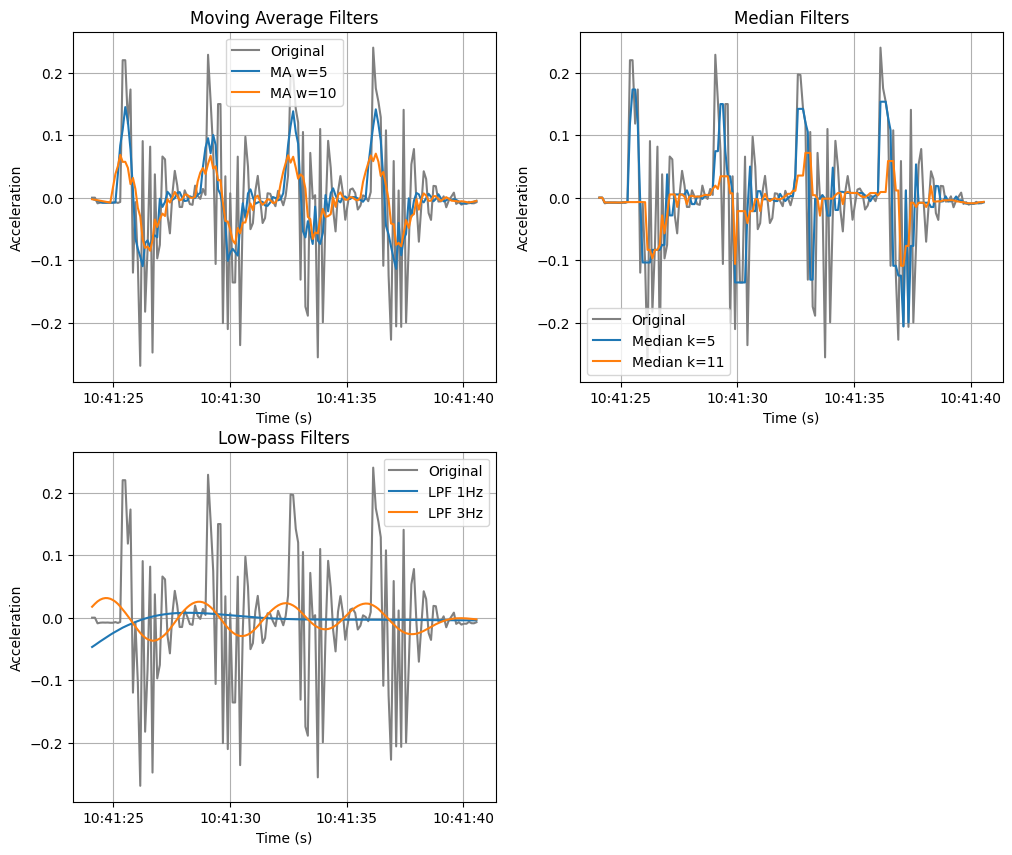

In [6]:
plt.figure(figsize=(12, 10)) 

plt.subplot(2, 2, 1)
plt.plot(df['timestamp'], df['imu_acc_x'], label='Original', color='gray')
plt.plot(df['timestamp'], df['acc_x_ma5'], label='MA w=5')
plt.plot(df['timestamp'], df['acc_x_ma10'], label='MA w=10')
plt.title('Moving Average Filters')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration')
plt.grid()
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(df['timestamp'], df['imu_acc_x'], label='Original', color='gray')
plt.plot(df['timestamp'], df['acc_x_med5'], label='Median k=5')
plt.plot(df['timestamp'], df['acc_x_med11'], label='Median k=11')
plt.title('Median Filters')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration')
plt.grid()
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(df['timestamp'], df['imu_acc_x'], label='Original', color='gray')
plt.plot(df['timestamp'], df['acc_x_lp1'], label='LPF 1Hz')
plt.plot(df['timestamp'], df['acc_x_lp3'], label='LPF 3Hz')
plt.title('Low-pass Filters')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration')
plt.grid()
plt.legend()




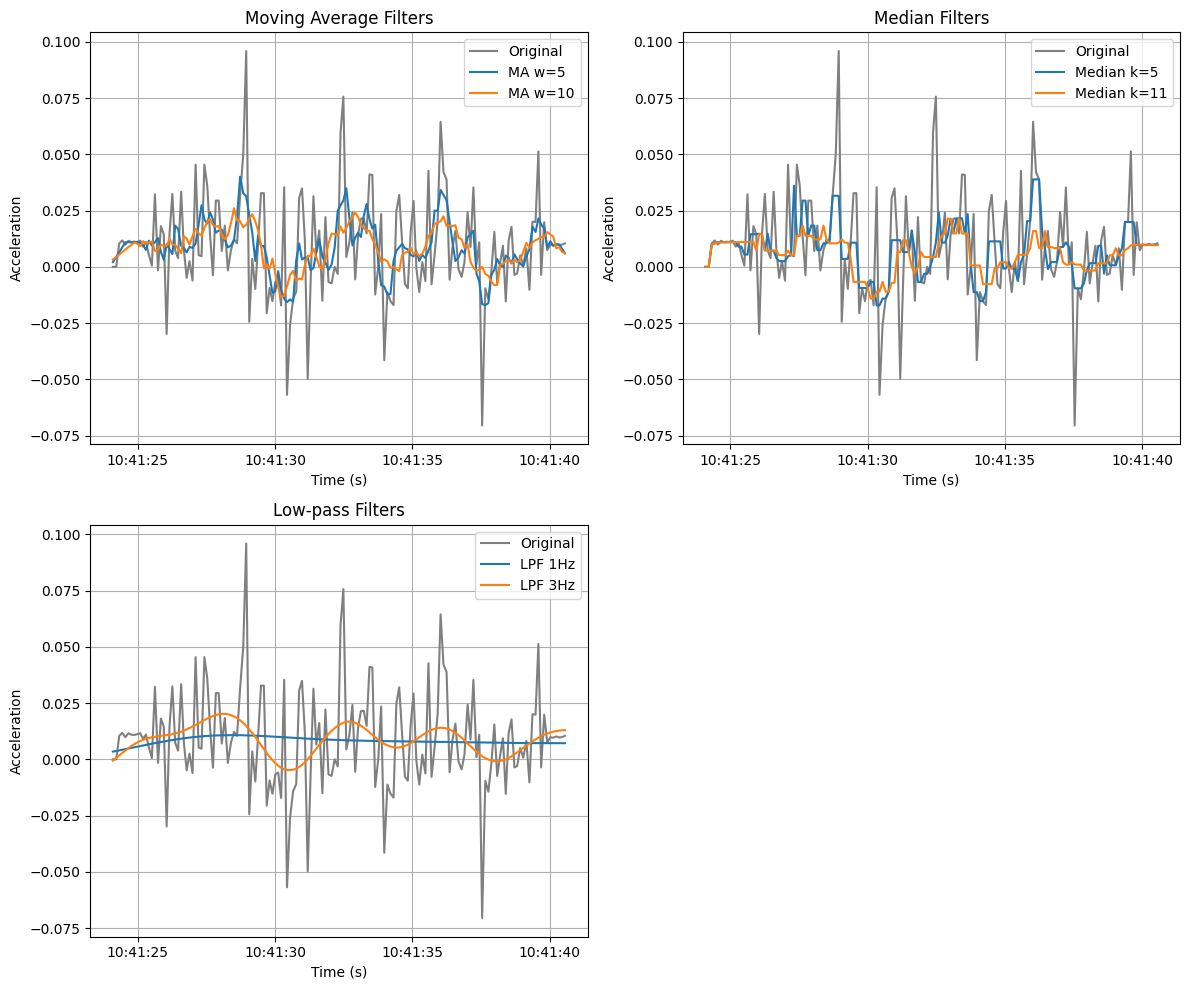

In [7]:
plt.figure(figsize=(12, 10)) 

plt.subplot(2, 2, 1)
plt.plot(df['timestamp'], df['imu_acc_y'], label='Original', color='gray')
plt.plot(df['timestamp'], df['acc_y_ma5'], label='MA w=5')
plt.plot(df['timestamp'], df['acc_y_ma10'], label='MA w=10')
plt.title('Moving Average Filters')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration')
plt.grid()
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(df['timestamp'], df['imu_acc_y'], label='Original', color='gray')
plt.plot(df['timestamp'], df['acc_y_med5'], label='Median k=5')
plt.plot(df['timestamp'], df['acc_y_med11'], label='Median k=11')
plt.title('Median Filters')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration')
plt.grid()
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(df['timestamp'], df['imu_acc_y'], label='Original', color='gray')
plt.plot(df['timestamp'], df['acc_y_lp1'], label='LPF 1Hz')
plt.plot(df['timestamp'], df['acc_y_lp3'], label='LPF 3Hz')
plt.title('Low-pass Filters')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


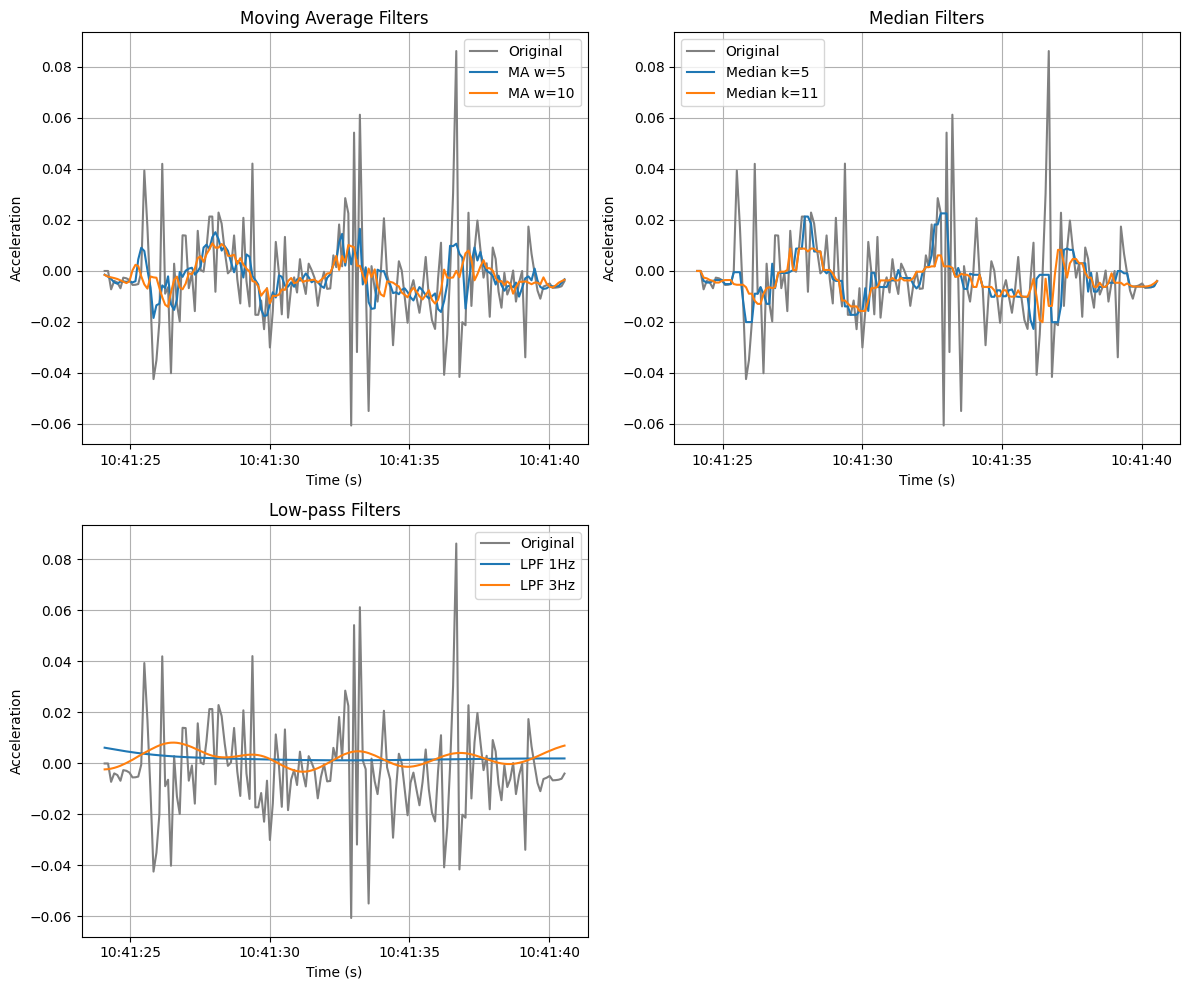

In [8]:
plt.figure(figsize=(12, 10)) 

plt.subplot(2, 2, 1)
plt.plot(df['timestamp'], df['imu_gyro_x'], label='Original', color='gray')
plt.plot(df['timestamp'], df['gyro_x_ma5'], label='MA w=5')
plt.plot(df['timestamp'], df['gyro_x_ma10'], label='MA w=10')
plt.title('Moving Average Filters')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration')
plt.grid()
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(df['timestamp'], df['imu_gyro_x'], label='Original', color='gray')
plt.plot(df['timestamp'], df['gyro_x_med5'], label='Median k=5')
plt.plot(df['timestamp'], df['gyro_x_med11'], label='Median k=11')
plt.title('Median Filters')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration')
plt.grid()
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(df['timestamp'], df['imu_gyro_x'], label='Original', color='gray')
plt.plot(df['timestamp'], df['gyro_x_lp1'], label='LPF 1Hz')
plt.plot(df['timestamp'], df['gyro_x_lp3'], label='LPF 3Hz')
plt.title('Low-pass Filters')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


KeyError: 'gyro_y_lp1'

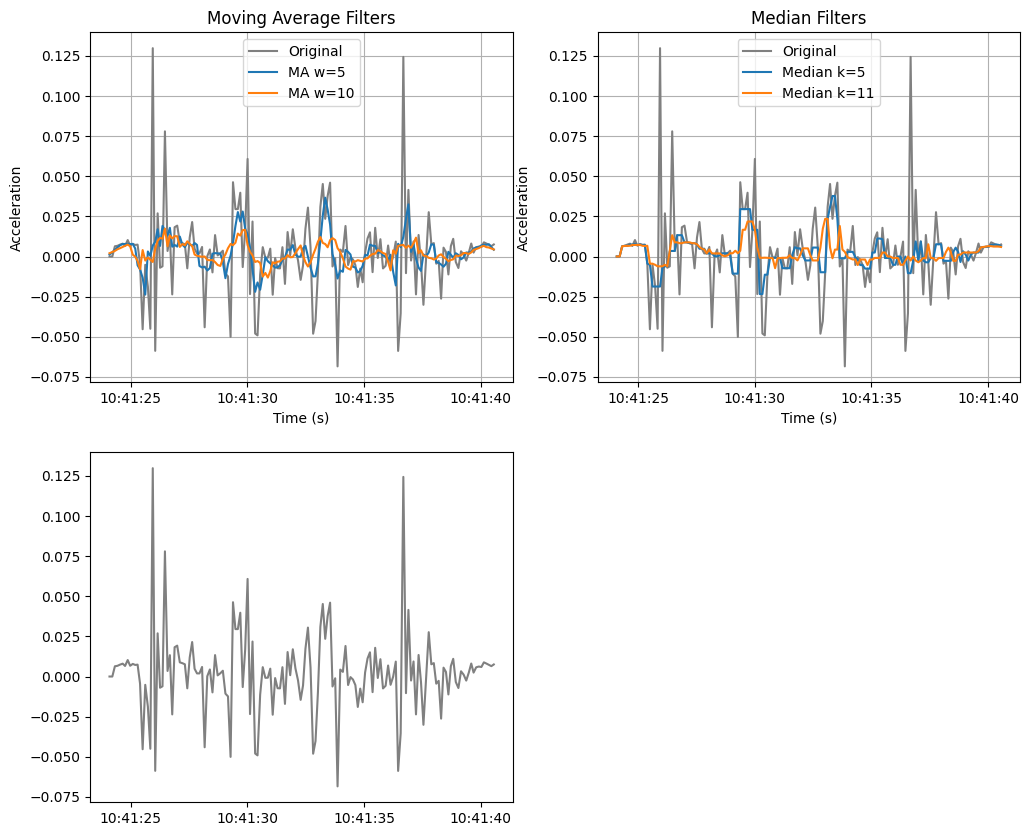

In [9]:
plt.figure(figsize=(12, 10)) 

plt.subplot(2, 2, 1)
plt.plot(df['timestamp'], df['imu_gyro_y'], label='Original', color='gray')
plt.plot(df['timestamp'], df['gyro_y_ma5'], label='MA w=5')
plt.plot(df['timestamp'], df['gyro_y_ma10'], label='MA w=10')
plt.title('Moving Average Filters')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration')
plt.grid()
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(df['timestamp'], df['imu_gyro_y'], label='Original', color='gray')
plt.plot(df['timestamp'], df['gyro_y_med5'], label='Median k=5')
plt.plot(df['timestamp'], df['gyro_y_med11'], label='Median k=11')
plt.title('Median Filters')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration')
plt.grid()
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(df['timestamp'], df['imu_gyro_y'], label='Original', color='gray')
plt.plot(df['timestamp'], df['gyro_y_lp1'], label='LPF 1Hz')
plt.plot(df['timestamp'], df['gyro_y_lp3'], label='LPF 3Hz')
plt.title('Low-pass Filters')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


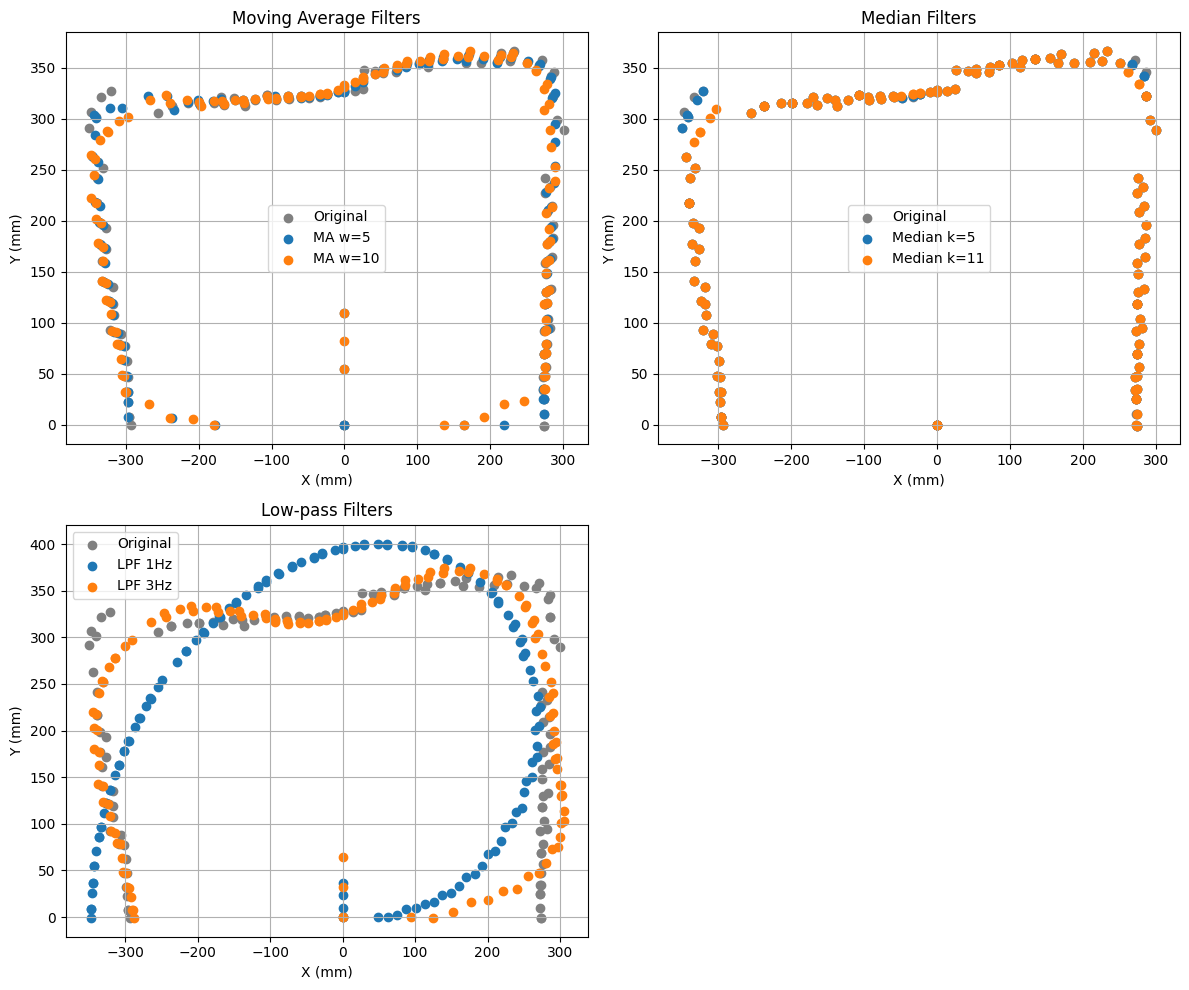

In [ ]:
plt.figure(figsize=(12, 10))

angles_rad = np.deg2rad(df2['angle'])
distances = df2['tof']

u = distances * np.cos(angles_rad)
v = distances * np.sin(angles_rad)

# Moving Average
plt.subplot(2, 2, 1)
plt.scatter(v, u, label='Original', color='gray')
plt.scatter(df2['tof_ma5'] * np.sin(angles_rad), df2['tof_ma5'] * np.cos(angles_rad), label='MA w=5')
plt.scatter(df2['tof_ma10'] * np.sin(angles_rad), df2['tof_ma10'] * np.cos(angles_rad), label='MA w=10')
plt.title('Moving Average Filters')
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.grid()
plt.legend()

# Median
plt.subplot(2, 2, 2)
plt.scatter(v, u, label='Original', color='gray')
plt.scatter(df2['tof_med5'] * np.sin(angles_rad), df2['tof_med5'] * np.cos(angles_rad), label='Median k=5')
plt.scatter(df2['tof_med11'] * np.sin(angles_rad), df2['tof_med11'] * np.cos(angles_rad), label='Median k=11')
plt.title('Median Filters')
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.grid()
plt.legend()

# Low-pass
plt.subplot(2, 2, 3)
plt.scatter(v, u, label='Original', color='gray')
plt.scatter(df2['tof_lp1'] * np.sin(angles_rad), df2['tof_lp1'] * np.cos(angles_rad), label='LPF 1Hz')
plt.scatter(df2['tof_lp3'] * np.sin(angles_rad), df2['tof_lp3'] * np.cos(angles_rad), label='LPF 3Hz')
plt.title('Low-pass Filters')
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

# 1. จากกราฟสัญญาณของ acc_x และ acc_y ที่ได้จากไฟล์ .csv นักศึกษาสังเกตเห็นรูปแบบใดบ้างที่บ่งบอกถึงการเคลื่อนที่ของหุ่นยนต์? (ระบุว่ามีจุดที่สัญญาณเปลี่ยนแปลงแบบฉับพลัน หรือมีการแกว่งของค่าอย่างชัดเจนหรือไม่)

Acc_xจะเปลี่ยนแปลงฉับพลันเมื่อเกิดการหยุดเพื่อเลี้ยว

Acc_yจะเปลี่ยนแปลงฉับพลัน	เมื่อเลี้ยวเสร็จแล้วตรง

# 2.มีส่วนใดของสัญญาณ gyro_x หรือ gyro_y ที่แสดงพฤติกรรมที่ผิดปกติ เช่น ความผันผวนสูง, noise หรือ outlier หรือไม่? นักศึกษาคิดว่าเกิดจากอะไร?

ยังมีค่า noise เล็กน้อย เพราะ เมื่อหุนยนต์ มีการเคลื่อนที่ช่วงต้น กับช่วงปลายมีการสั่น ของหุ่นยนต์ ทำให้ sensor จับค่าผิดปกติเล็กน้อย

# 3.	 จากกราฟสัญญาณ Distance Sensor นักศึกษาเห็นแนวโน้มการเปลี่ยนแปลงของระยะทางอย่างไรเมื่อหุ่นยนต์เข้าใกล้วัตถุ? มี noise หรือค่าที่ผิดปกติหรือไม่?

Distance ระยะห่างจะลดลงเมื่อเข้าใกล้กำแพง และ มีnoiseเนื่องจากมีรูระหว่างกำแพงหรือกำแพงมีรูในจุดที่ sensor ผ่าน

# 4.	 ถ้าจะเลือกฟิลเตอร์เบื้องต้นเพื่อปรับปรุงคุณภาพสัญญาณจาก IMU และ Distance Sensor นักศึกษาคิดว่าจะใช้ฟิลเตอร์ชนิดใดก่อน และเพราะเหตุใด?

Median filter เพราะใช้ง่าย และลบสัญญาณที่เป็น spikeได้ดี และกันการเดินแบบฉับพลันได้ เมื่อ ไปนับทำ encoding

# 5.	 จากการทดลอง ฟิลเตอร์ใดให้ผลลัพธ์การลด noise ได้ดีที่สุดในแต่ละกรณี? เพราะอะไร?

Median Filter มีoutlier/spike เพราะกรองค่าผิดปกติได้ดีโดยไม่ทำให้สัญญาณเบลอ

Moving Average ต้องการสัญญาณที่ดูเรียบ เพราะลดความผันผวน ให้สัญญาณดูราบเรียบขึ้น

Low-pass Filter ต้องการคลื่นลักษณะแท้ เพราะตัดเฉพาะ noise ความถี่สูง โดยไม่ทำให้ signal ผิดเพี้ยน


# 6.	หากกำหนด window size ของ Moving Average ใหญ่เกินไป จะเกิดผลกระทบใดต่อรูปแบบสัญญาณ?

ทำให้ค่าที่ได้มีค่าน้อยเกินไป

# 7.	เปรียบเทียบผลของ Low-pass Filter กับ Median Filter ในสถานการณ์ที่มีแรงกระแทกหรือการเปลี่ยนแปลงรวดเร็ว

Low-pass Filter ตอบสนองช้า ความแรงหรือการกระแทกดูเบาลง หรืออาจเบลอหายไป

Median Filter ตัด spike ได้ดีมาก ค่าผิดปกติแบบเฉียบพลันจะถูกกรองออก

# 8.	หากต้องเลือกใช้ฟิลเตอร์เดียวเพื่อใช้ในระบบหลบหลีกสิ่งกีดขวางของหุ่นยนต์จริง คุณจะเลือกแบบใด และเพราะอะไร?

Median Filter เพราะสามารถลดสัญญาณผิดปกติได้ดี ตอบสนองเร็ว และเหมาะกับงานหลบหลีกสิ่งกีดขวางที่ต้องการความแม่นยำและความไว.